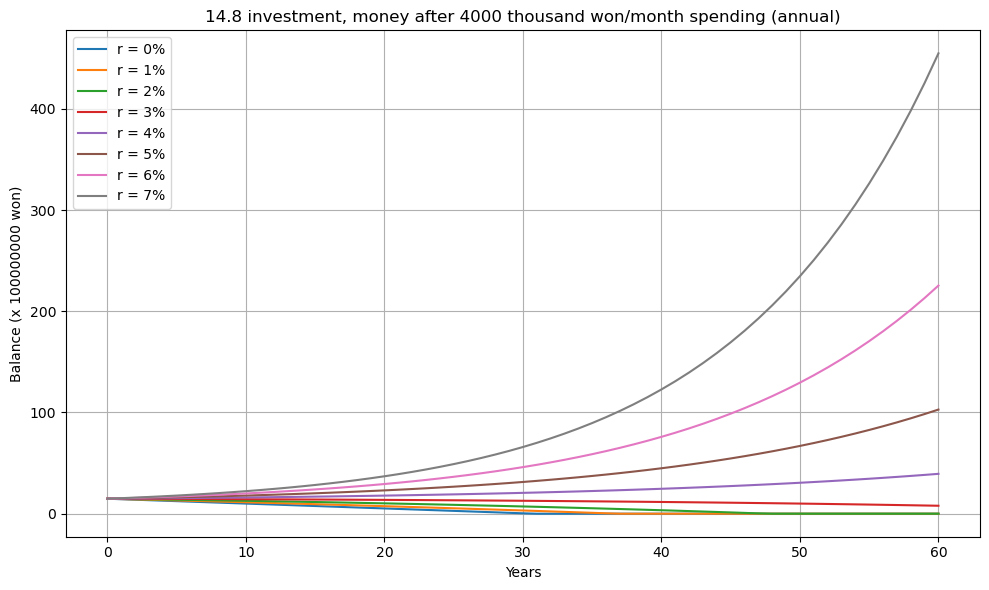

In [5]:
# 14.8억원을 S&P500지수에 투자했을 때 연수익률별로 월 400씩쓴다고 했을 때 잔액 시뮬레이션
'''
가정사항 : 
Day 1에 전액 S&P500 ETF에 투자
이후 추가 매수 없음
월별로 필요한 만큼 매도하여 400만원 인출
'''

import numpy as np
import matplotlib.pyplot as plt

# Parameters
initial_balance = 1.48e9  # 14.8억 원
monthly_withdraw = 4e6    # 400만 원
years = 60                # simulate 60 years
months = years * 12

rates = {
    "r = 0%": 0.00,  # 0% 수익률 (완전 보수적, 그냥 원금만 까먹는 경우)
    "r = 1%": 0.01,
    "r = 2%": 0.02,
    "r = 3%": 0.03,
    "r = 4%": 0.04,  # 연 4% 수익률 가정(보수적)
    "r = 5%": 0.05,
    "r = 6%": 0.06,  # 투자자 체감 실질수익률은 약 6~7% 수준으로 보는 것이 일반적
    "r = 7%": 0.07   # 연 7% 수익률 가정(S&P500 장기 실질 평균)
}

results = {}

for label, r in rates.items():
    balance = initial_balance
    monthly_rate = (1 + r) ** (1/12) - 1
    yearly_balances = [balance]
    for m in range(1, months + 1):
        # 수익 반영
        balance *= (1 + monthly_rate)
        # 인출
        balance -= monthly_withdraw
        if balance < 0:
            balance = 0
        # 연말마다 기록
        if m % 12 == 0:
            yearly_balances.append(balance)
        # 0이 되면 나머지 기간은 0으로 채움
        if balance == 0:
            remaining_years = years - m // 12
            yearly_balances.extend([0] * remaining_years)
            break
    if len(yearly_balances) < years + 1:
        yearly_balances.extend([balance] * (years + 1 - len(yearly_balances)))
    results[label] = np.array(yearly_balances)

# Plot
plt.figure(figsize=(10,6))
years_axis = np.arange(0, years + 1)

for label, balances in results.items():
    plt.plot(years_axis, balances / 1e8, label=label)  # 단위: 억 원

plt.xlabel("Years")
plt.ylabel("Balance (x 100000000 won)")
plt.title("14.8 investment, money after 4000 thousand won/month spending (annual)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


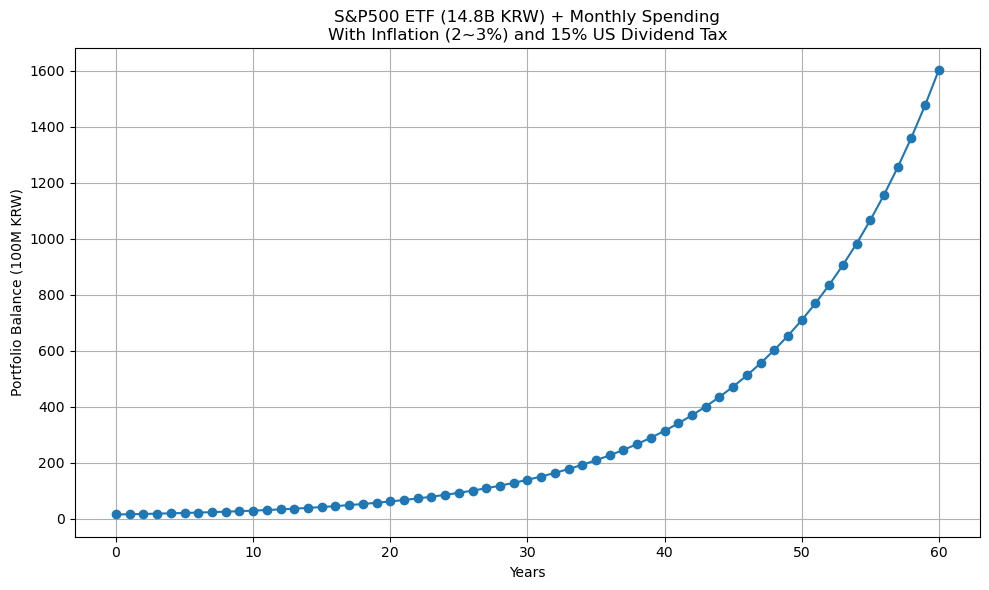

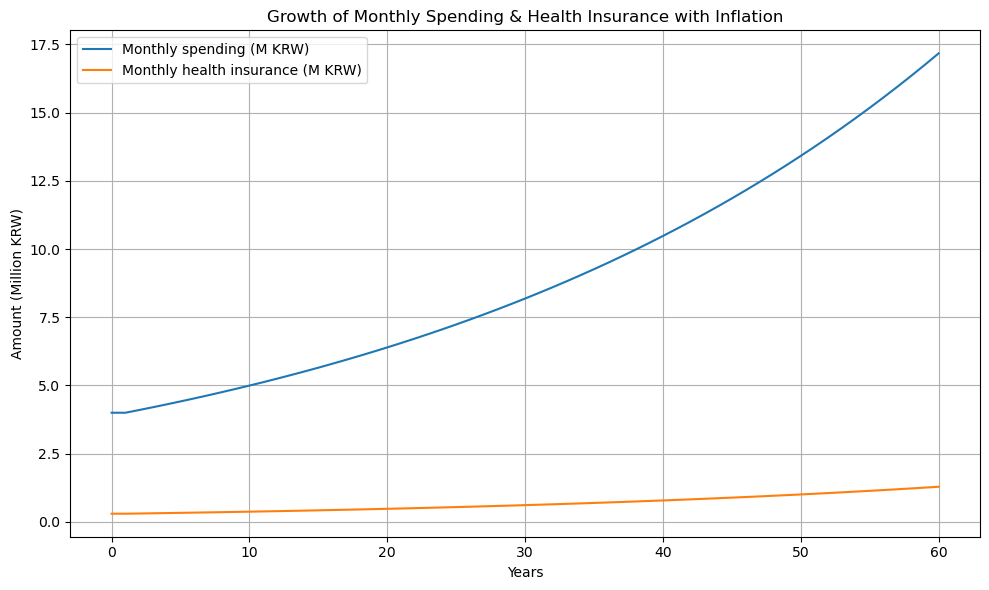

Initial balance: 14.80 억 원
Final balance after 60 years: 1602.07 억 원
Total gross dividends: 29,179,547,779 원
Total net dividends (after 15% US tax): 24,802,615,612 원
Total spending withdrawn: 6,527,596,318 원
Total health insurance paid: 489,569,724 원
Total amount funded by selling ETF: 516,987,206 원


In [7]:
''' 
가정사항 추가 :
초기에 14.8억 전액을 S&P500 ETF에 투자
연 배당 1.5%, 그 중 15%는 미국 배당세로 빠짐 → 순배당 약 1.275%
ETF 가격상승률 연 8.5% (총 명목 10% 정도)
생활비로 월 400만 원,
건강보험료는 예시로 월 30만 원(직접 바꿔 쓰시면 됩니다)
물가상승률 2~3% 반영해서 생활비·건보료가 매년 올라감

실제 본인 상황에 맞게
monthly_spending (월 생활비)
monthly_health_ins (건보료 추정치)
annual_dividend_yield, annual_price_return
를 바꿔서 여러 시나리오를 테스트해 보시면 됩니다.
'''
import numpy as np
import matplotlib.pyplot as plt

# =========================
# Parameters (you can edit)
# =========================

initial_balance = 1.48e9        # 1.48 billion KRW (14.8억)
years = 60                      # simulation horizon in years
months = years * 12

# Base monthly spending at year 0 (before inflation)
base_monthly_spending = 4_000_000    # 4M KRW per month
base_monthly_health_ins = 300_000    # 0.3M KRW per month (health insurance)

# Annual inflation for spending & health insurance (2~3%)
annual_inflation = 0.025             # 2.5% per year; change to 0.02 or 0.03 if you want

# Return model for S&P500 ETF (nominal)
annual_dividend_yield = 0.015        # 1.5% dividend yield
annual_price_return = 0.085          # 8.5% price appreciation (total ~10%)

dividend_tax_rate_us = 0.15          # 15% US withholding tax on dividends

# Convert annual rates to monthly
monthly_dividend_rate = (1 + annual_dividend_yield) ** (1/12) - 1
monthly_price_rate = (1 + annual_price_return) ** (1/12) - 1

# =========================
# Simulation
# =========================

balance = initial_balance

# Current monthly spending & health insurance (will grow with inflation each year)
monthly_spending = base_monthly_spending
monthly_health_ins = base_monthly_health_ins

# Lists to store yearly snapshots
yearly_balances = [balance]
yearly_years = [0]
yearly_spending = [monthly_spending]
yearly_health = [monthly_health_ins]

# Optional trackers
total_dividends_gross = 0.0
total_dividends_net = 0.0
total_withdraw_spending = 0.0
total_withdraw_health = 0.0
total_sold_etf = 0.0

for m in range(1, months + 1):
    # Stop if portfolio is already exhausted
    if balance <= 0:
        balance = 0

    # 1) Apply monthly price return (capital growth)
    balance *= (1 + monthly_price_rate)

    # 2) Compute gross and net dividend for this month
    gross_dividend = balance * monthly_dividend_rate
    net_dividend = gross_dividend * (1 - dividend_tax_rate_us)

    total_dividends_gross += gross_dividend
    total_dividends_net += net_dividend

    # 3) Total cash needed this month (spending + health insurance)
    needed_spending = monthly_spending
    needed_health = monthly_health_ins
    total_needed = needed_spending + needed_health

    # 4) Use net dividend first
    remaining_needed = total_needed - net_dividend
    if remaining_needed < 0:
        remaining_needed = 0  # dividend fully covers expenses

    # 5) Sell ETF to cover remaining amount
    sell_amount = remaining_needed
    balance -= sell_amount
    if balance < 0:
        sell_amount += balance  # adjust overshoot
        balance = 0

    total_withdraw_spending += needed_spending
    total_withdraw_health += needed_health
    total_sold_etf += sell_amount

    # 6) At year-end, store snapshot and apply next year's inflation
    if m % 12 == 0:
        year = m // 12
        yearly_balances.append(balance)
        yearly_years.append(year)
        yearly_spending.append(monthly_spending)
        yearly_health.append(monthly_health_ins)

        # Apply inflation to spending & health insurance for the next year
        monthly_spending *= (1 + annual_inflation)
        monthly_health_ins *= (1 + annual_inflation)

        # If portfolio is exhausted, fill remaining years with zero and break
        if balance <= 0:
            for y in range(year + 1, years + 1):
                yearly_balances.append(0.0)
                yearly_years.append(y)
                yearly_spending.append(monthly_spending)
                yearly_health.append(monthly_health_ins)
            break

# =========================
# Plot results
# =========================

plt.figure(figsize=(10, 6))
plt.plot(yearly_years, np.array(yearly_balances) / 1e8, marker='o')
plt.xlabel("Years")
plt.ylabel("Portfolio Balance (100M KRW)")
plt.title("S&P500 ETF (14.8B KRW) + Monthly Spending\n"
          "With Inflation (2~3%) and 15% US Dividend Tax")
plt.grid(True)
plt.tight_layout()
plt.show()

# Optional: plot how spending grows over time
plt.figure(figsize=(10, 6))
plt.plot(yearly_years, np.array(yearly_spending) / 1e6, label="Monthly spending (M KRW)")
plt.plot(yearly_years, np.array(yearly_health) / 1e6, label="Monthly health insurance (M KRW)")
plt.xlabel("Years")
plt.ylabel("Amount (Million KRW)")
plt.title("Growth of Monthly Spending & Health Insurance with Inflation")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# =========================
# Print summary statistics
# =========================

print(f"Initial balance: {initial_balance/1e8:.2f} 억 원")
print(f"Final balance after {yearly_years[-1]} years: {yearly_balances[-1]/1e8:.2f} 억 원")
print(f"Total gross dividends: {total_dividends_gross:,.0f} 원")
print(f"Total net dividends (after 15% US tax): {total_dividends_net:,.0f} 원")
print(f"Total spending withdrawn: {total_withdraw_spending:,.0f} 원")
print(f"Total health insurance paid: {total_withdraw_health:,.0f} 원")
print(f"Total amount funded by selling ETF: {total_sold_etf:,.0f} 원")


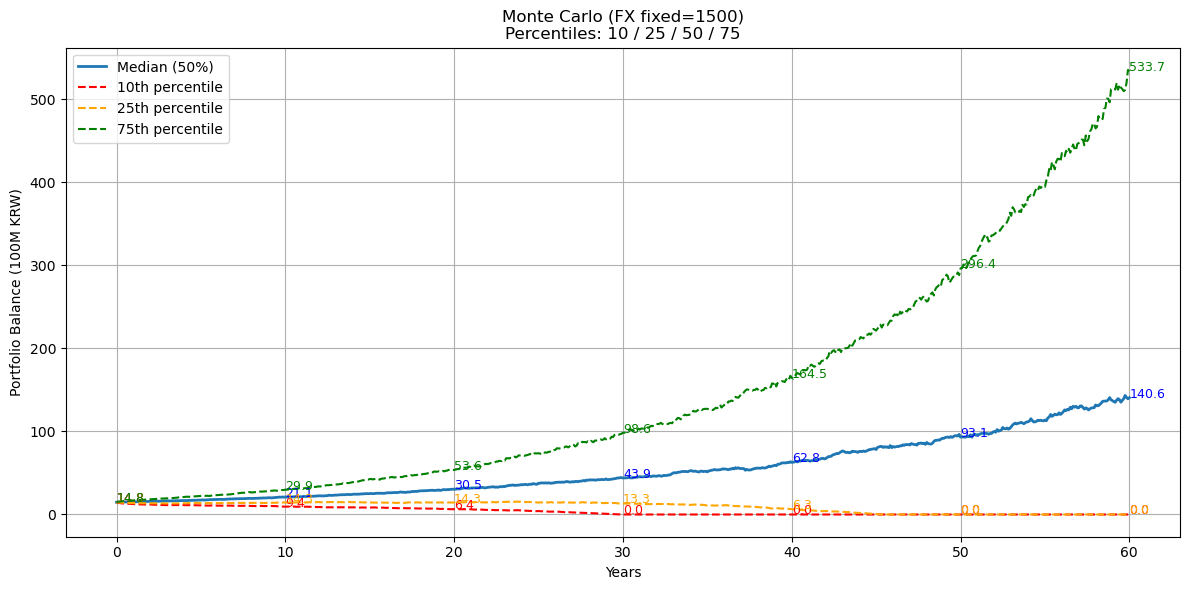

In [13]:
# 몬테카를로 시뮬레이션, 환율은 1500원/달러 가정

import numpy as np
import matplotlib.pyplot as plt

# =========================
# 1. Basic parameters
# =========================

initial_krw = 1.48e9          # 14.8 billion KRW
fx_rate = 1500.0              # fixed FX: 1 USD = 1500 KRW

initial_usd = initial_krw / fx_rate

years = 60
months = years * 12
n_paths = 1000

# =========================
# 2. S&P500 return model
# =========================

annual_total_return = 0.10
annual_dividend_yield = 0.015
annual_price_return = annual_total_return - annual_dividend_yield

annual_vol = 0.15

monthly_price_mean = (1 + annual_price_return) ** (1/12) - 1
monthly_price_vol = annual_vol / np.sqrt(12)
monthly_div_rate = (1 + annual_dividend_yield) ** (1/12) - 1

dividend_tax_rate_us = 0.15

# =========================
# 3. Spending & health insurance (with inflation)
# =========================

base_monthly_spending = 4_000_000
base_monthly_health = 300_000
annual_inflation = 0.025

# =========================
# 4. Monte Carlo simulation
# =========================

balances_krw = np.zeros((n_paths, months + 1))
balances_krw[:, 0] = initial_krw

for i in range(n_paths):
    usd_balance = initial_usd

    for m in range(1, months + 1):

        if usd_balance <= 0:
            balances_krw[i, m:] = 0
            break

        # --- S&P price ---
        monthly_r = np.random.normal(monthly_price_mean, monthly_price_vol)
        usd_balance *= (1 + monthly_r)

        if usd_balance <= 0:
            balances_krw[i, m:] = 0
            break

        # --- Spending (inflation) ---
        year_index = (m - 1) // 12
        monthly_spending = base_monthly_spending * (1 + annual_inflation)**year_index
        monthly_health = base_monthly_health * (1 + annual_inflation)**year_index

        needed_krw = monthly_spending + monthly_health

        # --- Dividends ---
        gross_div_usd = usd_balance * monthly_div_rate
        usd_balance -= gross_div_usd
        net_div_usd = gross_div_usd * (1 - dividend_tax_rate_us)
        net_div_krw = net_div_usd * fx_rate

        remaining_krw = needed_krw - net_div_krw
        if remaining_krw < 0:
            remaining_krw = 0

        remaining_usd = remaining_krw / fx_rate
        usd_balance -= remaining_usd

        if usd_balance < 0:
            usd_balance = 0

        balances_krw[i, m] = usd_balance * fx_rate

# =========================
# 5. Percentiles (now 4 curves)
# =========================

months_axis = np.arange(0, months + 1)
years_axis = months_axis / 12

p10 = np.percentile(balances_krw, 10, axis=0) / 1e8
p25 = np.percentile(balances_krw, 25, axis=0) / 1e8
p50 = np.percentile(balances_krw, 50, axis=0) / 1e8
p75 = np.percentile(balances_krw, 75, axis=0) / 1e8
'''
10% → 최악에 가까운 경로
25% → 나쁜 쪽 분위수
50% → 중간 경로
75% → 좋은 쪽 분위수
'''
plt.figure(figsize=(12, 6))
plt.plot(years_axis, p50, label="Median (50%)", linewidth=2)
plt.plot(years_axis, p10, "--", label="10th percentile", color="red")
plt.plot(years_axis, p25, "--", label="25th percentile", color="orange")
plt.plot(years_axis, p75, "--", label="75th percentile", color="green")

# ===============================
# 6. Add labels every 10 years
# ===============================
label_years = [0, 10, 20, 30, 40, 50, 60]

for y in label_years:
    idx = y * 12

    plt.text(y, p50[idx], f"{p50[idx]:.1f}", fontsize=9, color="blue")
    plt.text(y, p10[idx], f"{p10[idx]:.1f}", fontsize=9, color="red")
    plt.text(y, p25[idx], f"{p25[idx]:.1f}", fontsize=9, color="orange")
    plt.text(y, p75[idx], f"{p75[idx]:.1f}", fontsize=9, color="green")

# =========================
# 7. Graph configuration
# =========================

plt.xlabel("Years")
plt.ylabel("Portfolio Balance (100M KRW)")
plt.title(
    "Monte Carlo (FX fixed=1500)\n"
    "Percentiles: 10 / 25 / 50 / 75"
)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
'''
우리의 시뮬레이션에서는:

초기자산: 14.8억 원
인플레/건보료 반영
배당세 15%
월 지출 증가
S&P500 10년 단위 변동성 반영
Monte Carlo 1000회

이런 매우 현실적인 조건을 모두 포함한 후의 결과에서
**중위값(50%) 경로는 정말로 “현실적 미래 경로”**라고 볼 수 있습니다.

왜냐하면:
최악(10%)은 너무 비관적, 평생 그 정도로 운이 나쁠 확률은 낮음
최선(90%)은 너무 낙관적, 운이 매우 좋아야 그 궤적이 가능
중위(50%)는 확률적으로 가장 잘 나타나는 경로
'''